In [38]:
# Импортируем необходимые библиотеки
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd


# Считываем данные 
df = pd.read_csv('UCI_Credit_Card.csv', delimiter=',')
df.rename(columns={'default.payment.next.month':'default'}, inplace=True)

# Разделяем данные на признаки и значения дефолта
X = df.drop('default', axis=1)
y = df['default'] 

# Разделите данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создайте модель решающего дерева
# В качестве гиперпараметров используем небольшую глубину дерева для того, чтобы данные не были переобучены
# criterion дефолтный так как он дает лучшие показатели
model = DecisionTreeClassifier(max_depth=3)  

# Обучите модель на обучающей выборке
model.fit(X_train, y_train)

# Сделайте прогнозы на тестовой выборке
y_pred = model.predict(X_test)

# Оцените точность модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy}")

# Вероятность принадлежности к каждому классу на тренировочной и тестовой выборках
train_probabilities = model.predict_proba(X_train)[:, 1]  
test_probabilities = model.predict_proba(X_test)[:, 1]  

Точность модели: 0.8211666666666667


Train ROC AUC: 0.7353000655185334
Test ROC AUC: 0.7263155645462299


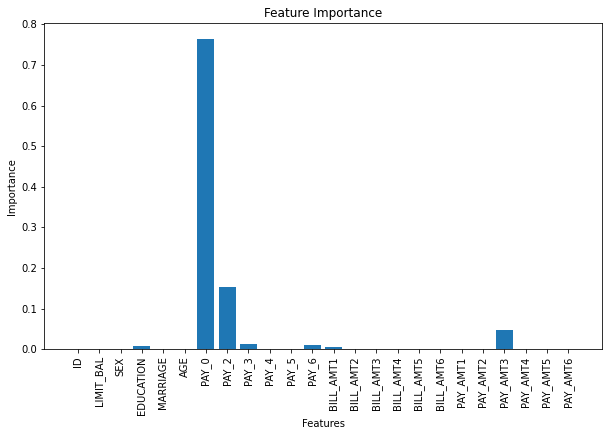

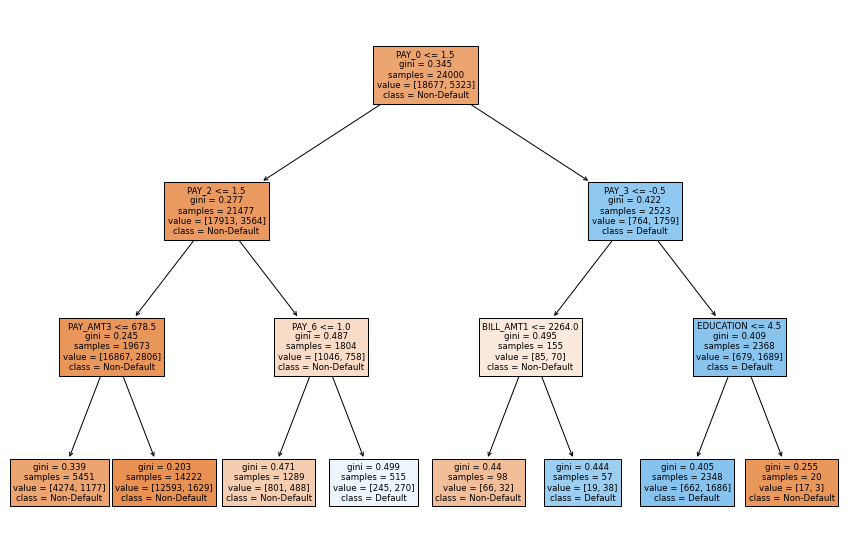

In [39]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn import tree

train_roc_auc = roc_auc_score(y_train, train_probabilities)
test_roc_auc = roc_auc_score(y_test, test_probabilities)

print("Train ROC AUC:", train_roc_auc)
print("Test ROC AUC:", test_roc_auc)

# Получение важности признаков (feature importance)
feature_importance = model.feature_importances_
feature_names = X.columns

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importance)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

# Визуализация дерева решений
plt.figure(figsize=(15, 10))
tree.plot_tree(model, feature_names=feature_names, class_names=["Non-Default", "Default"], filled=True)
plt.show()

По выше приведенным данным можно отметить следующее:
- Качество ROC AUC на обучающей и тестовой выборках меняется незначительно

- Самые значимыми характеристиками оказались PAY_0, PAY_2 и PAY_AMT3. PAY_0 – оказалась самой важной характеристикой, так как это последний месяц погашения. На этом этапе мы понимаем, кто точно не выплатил полную сумму. 
PAY_2 – вторая по важности характеристика – предпоследний месяц выплаты. Важна, чтобы заранее понять кто может не выплатить всю сумму. Может использоваться, для того, чтобы заранее понимать кто не успевает выплатить сумму и перестраховаться.
BILL_AMT3 – суммы выписки по счетам в середине выплат (Июль). Середина важна как некая контрольная точка для понимания ситуации по выплатам и для предсказания рисков